In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "HOG"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,26.267667,26.267667,25.482254,25.720257,3796400
2010-11-09,25.767859,25.863059,25.053848,25.188717,1880100
2010-11-10,25.180782,25.625055,25.022114,25.609188,1624100
2010-11-11,25.323582,25.775790,25.093511,25.648855,1541200
2010-11-12,25.371186,25.672658,24.950713,25.149050,1537400


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-08 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


<AxesSubplot:xlabel='Date'>

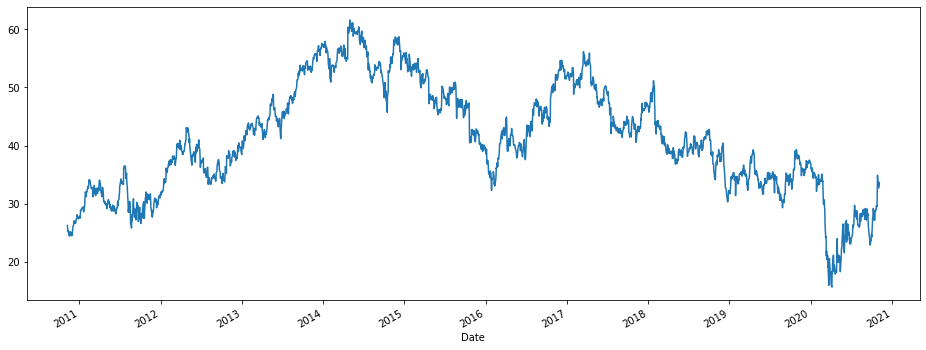

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1952, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0295
Epoch 2/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0074
Epoch 3/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0069
Epoch 4/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0064
Epoch 5/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0063
Epoch 6/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0057
Epoch 7/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0055
Epoch 8/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0055
Epoch 9/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0046
Epoch 10/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0047
Epoch 11/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0047
Epoch 12/100
1952/1952 [==============================] - 8s 4ms/step - lo

# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test

array([[[0.34591208],
        [0.32978212],
        [0.34187949],
        ...,
        [0.22315391],
        [0.26873516],
        [0.27255491]],

       [[0.32978212],
        [0.34187949],
        [0.37464319],
        ...,
        [0.26873516],
        [0.27255491],
        [0.26873537]],

       [[0.34187949],
        [0.37464319],
        [0.36531803],
        ...,
        [0.27255491],
        [0.26873537],
        [0.27586535]],

       ...,

       [[0.04084656],
        [0.05242059],
        [0.09333346],
        ...,
        [0.28134087],
        [0.25979245],
        [0.24551654]],

       [[0.05242059],
        [0.09333346],
        [0.1046383 ],
        ...,
        [0.25979245],
        [0.24551654],
        [0.22235196]],

       [[0.09333346],
        [0.1046383 ],
        [0.06776288],
        ...,
        [0.24551654],
        [0.22235196],
        [0.2492875 ]]])

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
X_test

array([[[0.34591208],
        [0.32978212],
        [0.34187949],
        ...,
        [0.22315391],
        [0.26873516],
        [0.27255491]],

       [[0.32978212],
        [0.34187949],
        [0.37464319],
        ...,
        [0.26873516],
        [0.27255491],
        [0.26873537]],

       [[0.34187949],
        [0.37464319],
        [0.36531803],
        ...,
        [0.27255491],
        [0.26873537],
        [0.27586535]],

       ...,

       [[0.04084656],
        [0.05242059],
        [0.09333346],
        ...,
        [0.28134087],
        [0.25979245],
        [0.24551654]],

       [[0.05242059],
        [0.09333346],
        [0.1046383 ],
        ...,
        [0.25979245],
        [0.24551654],
        [0.22235196]],

       [[0.09333346],
        [0.1046383 ],
        [0.06776288],
        ...,
        [0.24551654],
        [0.22235196],
        [0.2492875 ]]])

In [20]:
predicted_stock_price = regressor.predict(X_test)

In [21]:
predicted_stock_price

array([[ 0.27775437],
       [ 0.27524805],
       [ 0.27712324],
       [ 0.27676684],
       [ 0.26866972],
       [ 0.25398505],
       [ 0.25169078],
       [ 0.26489067],
       [ 0.26835632],
       [ 0.27101332],
       [ 0.28663668],
       [ 0.29328617],
       [ 0.29155576],
       [ 0.29394507],
       [ 0.30067587],
       [ 0.30211216],
       [ 0.30230802],
       [ 0.2900463 ],
       [ 0.29520226],
       [ 0.30210364],
       [ 0.31386295],
       [ 0.3119859 ],
       [ 0.32750136],
       [ 0.31992567],
       [ 0.30028847],
       [ 0.30852252],
       [ 0.30791676],
       [ 0.29529142],
       [ 0.28825626],
       [ 0.2881565 ],
       [ 0.2935034 ],
       [ 0.28838438],
       [ 0.28384924],
       [ 0.2572401 ],
       [ 0.25052205],
       [ 0.23042166],
       [ 0.23193936],
       [ 0.24576405],
       [ 0.25879252],
       [ 0.267177  ],
       [ 0.27222225],
       [ 0.28965962],
       [ 0.31369534],
       [ 0.3282779 ],
       [ 0.34425724],
       [ 0

In [22]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [23]:
y_test

array([[ 2.68735367e-01],
       [ 2.75865352e-01],
       [ 2.73573593e-01],
       [ 2.60586695e-01],
       [ 2.41488359e-01],
       [ 2.43016212e-01],
       [ 2.60841346e-01],
       [ 2.59568128e-01],
       [ 2.64151643e-01],
       [ 2.86815048e-01],
       [ 2.89616131e-01],
       [ 2.85541896e-01],
       [ 2.90125478e-01],
       [ 2.97510050e-01],
       [ 2.95727666e-01],
       [ 2.95472813e-01],
       [ 2.77393297e-01],
       [ 2.90125447e-01],
       [ 2.96236859e-01],
       [ 3.10751509e-01],
       [ 3.04131039e-01],
       [ 3.28831341e-01],
       [ 3.10751572e-01],
       [ 2.87069562e-01],
       [ 3.06168064e-01],
       [ 2.98783236e-01],
       [ 2.81619701e-01],
       [ 2.77760710e-01],
       [ 2.79818845e-01],
       [ 2.87279689e-01],
       [ 2.78275190e-01],
       [ 2.75445336e-01],
       [ 2.38656366e-01],
       [ 2.40971701e-01],
       [ 2.11643523e-01],
       [ 2.22963274e-01],
       [ 2.41228967e-01],
       [ 2.55121357e-01],
       [ 2.6

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [25]:
predicted_stock_price

array([[34.74685 ],
       [34.6538  ],
       [34.72342 ],
       [34.710186],
       [34.409576],
       [33.8644  ],
       [33.77922 ],
       [34.269276],
       [34.39794 ],
       [34.496586],
       [35.07661 ],
       [35.32348 ],
       [35.259235],
       [35.347942],
       [35.597828],
       [35.65115 ],
       [35.65842 ],
       [35.203197],
       [35.394615],
       [35.650833],
       [36.087406],
       [36.01772 ],
       [36.593742],
       [36.31249 ],
       [35.583443],
       [35.889137],
       [35.86665 ],
       [35.397926],
       [35.136738],
       [35.133038],
       [35.331543],
       [35.1415  ],
       [34.973125],
       [33.985245],
       [33.735832],
       [32.989594],
       [33.045937],
       [33.55919 ],
       [34.04288 ],
       [34.354156],
       [34.541466],
       [35.188843],
       [36.08118 ],
       [36.62257 ],
       [37.215813],
       [37.90105 ],
       [38.204197],
       [37.478268],
       [37.680634],
       [38.26454 ],


In [26]:
actual_stock_price.shape

(444, 1)

In [27]:
predicted_stock_price.shape

(444, 1)

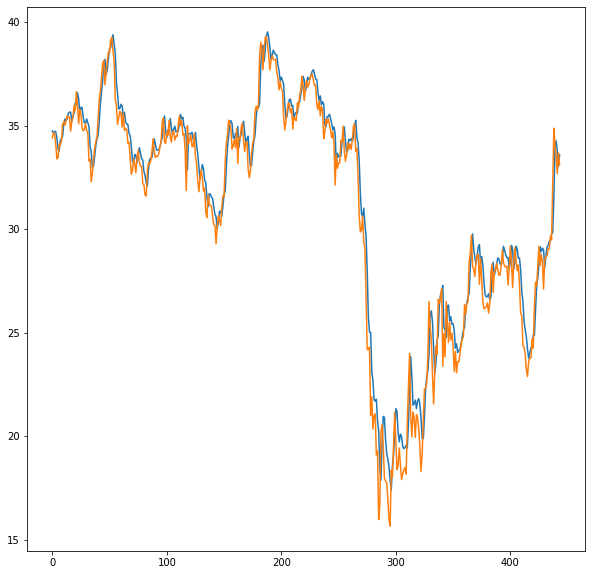

In [28]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [29]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [30]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


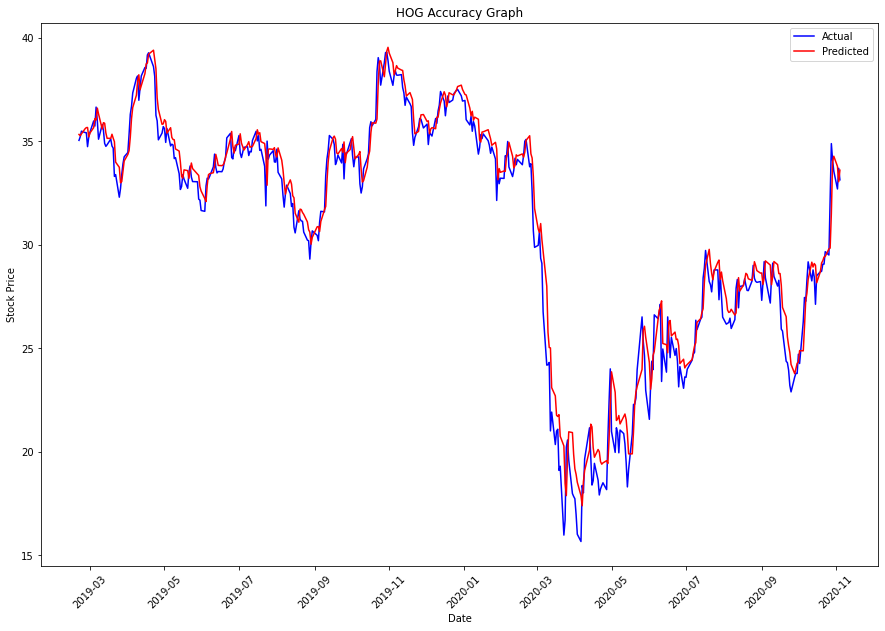

In [31]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

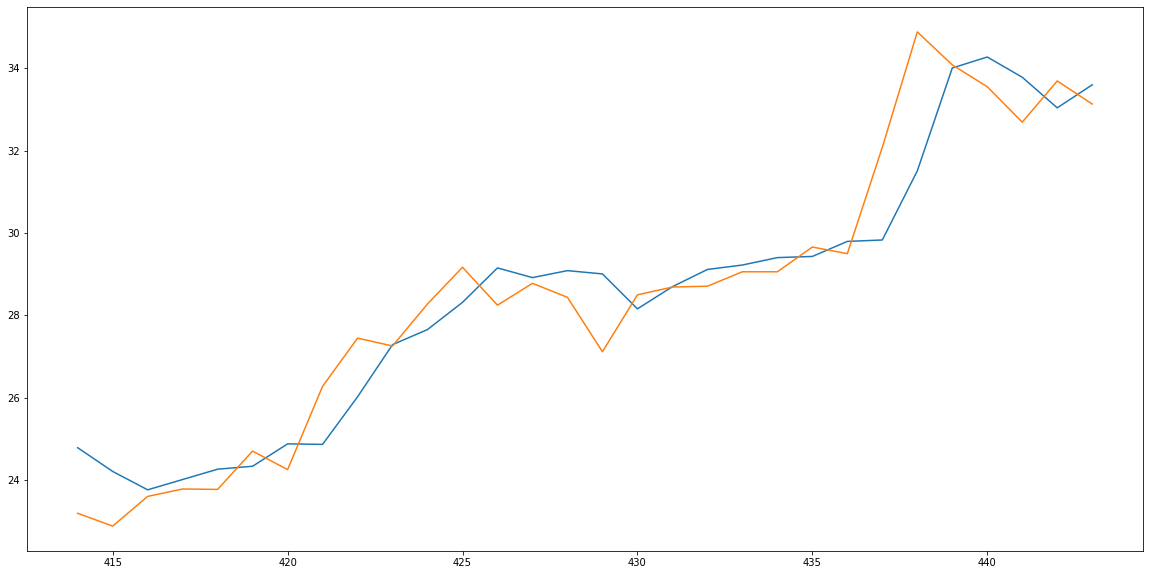

In [32]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [33]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)